# ADS Clustering Assignment 
## Name : Dharanee Dharan Kanagaraj
## student ID : 23035689

In [62]:
#Importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [63]:
#Reading dataset using pandas 
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [66]:
#gathering data type information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
#checking for null value counts in each coulmns in the dataset.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
#listing all the columns in the dataset 
list(enumerate(data))

[(0, 'fixed acidity'),
 (1, 'volatile acidity'),
 (2, 'citric acid'),
 (3, 'residual sugar'),
 (4, 'chlorides'),
 (5, 'free sulfur dioxide'),
 (6, 'total sulfur dioxide'),
 (7, 'density'),
 (8, 'pH'),
 (9, 'sulphates'),
 (10, 'alcohol'),
 (11, 'quality')]

In [69]:
'''
which is a measure of the linear correlation between two variables. 
It assesses how well the relationship between two variables can be described by a straight line
'''
data.corr(method ='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [70]:
#Listing cloumns which contais null values.
data.columns[np.sum(data.isnull())!=0]


Index([], dtype='object')

In [71]:
#clculating number of wors 
len(data)

1599

In [72]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [73]:
# Calculating kurtosis for each column
kurtosis_values = data.kurtosis()

# Print the kurtosis values
print(kurtosis_values)

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64


In [74]:

# Calculating skewness for each column
skewness = data.skew()

print("Skewness for each column:")
print(skewness)


Skewness for each column:
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64


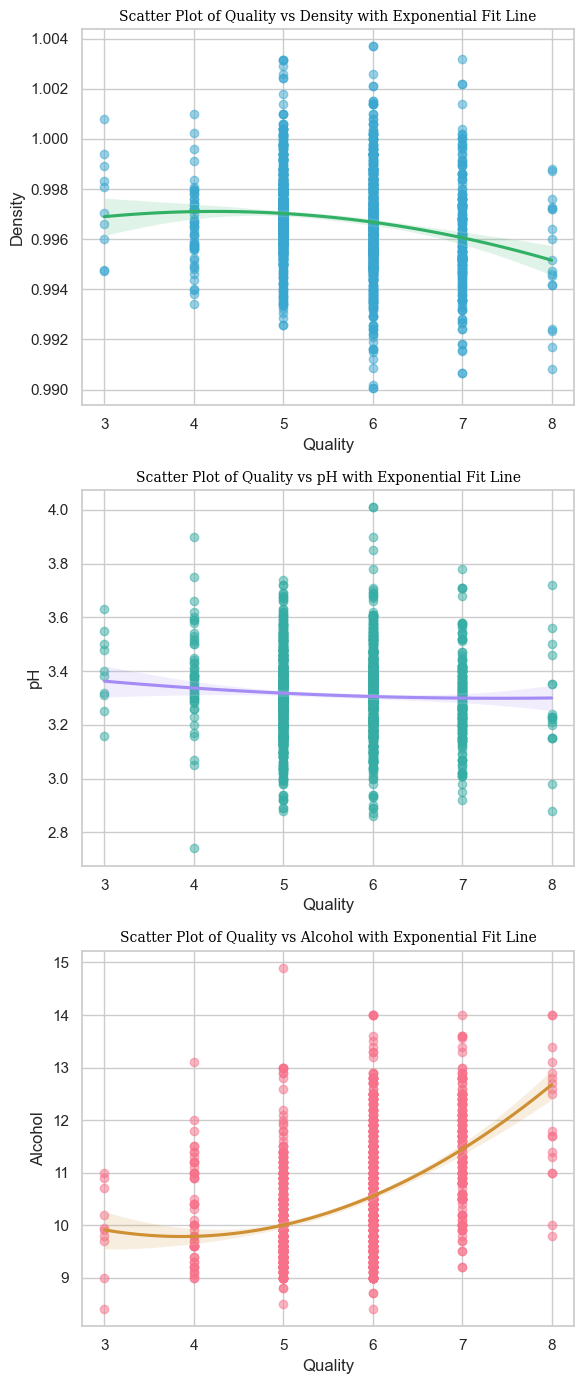

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plot(data):
    # Define a custom color palette
    custom_palette = sns.color_palette("husl", 8)

    # Set style
    sns.set(style="whitegrid")
    # Plotting scatter plots with exponential regression lines
    fig, axes = plt.subplots(3, 1, figsize=(6, 14))
    font1 = {'family': 'serif', 'color': 'black', 'size': 10, 'weight': 'normal'}

    # Scatter plot between 'quality' and 'density' columns with exponential regression line
    sns.regplot(x='quality', y='density', data=data, ax=axes[0], 
                scatter_kws={'alpha': 0.5, 'color': custom_palette[5]}, 
                line_kws={'color': custom_palette[3]}, order=2)
    axes[0].set_title('Scatter Plot of Quality vs Density with Exponential Fit Line', 
                      fontdict=font1)
    axes[0].set_xlabel('Quality')
    axes[0].set_ylabel('Density')

    # Scatter plot between 'quality' and 'pH' columns with exponential regression line
    sns.regplot(x='quality', y='pH', data=data, ax=axes[1], 
                scatter_kws={'alpha': 0.5, 'color': custom_palette[4]}, 
                line_kws={'color': custom_palette[6]}, order=2)
    axes[1].set_title('Scatter Plot of Quality vs pH with Exponential Fit Line', 
                      fontdict=font1)
    axes[1].set_xlabel('Quality')
    axes[1].set_ylabel('pH')

    # Scatter plot between 'quality' and 'alcohol' columns with exponential regression line
    sns.regplot(x='quality', y='alcohol', data=data, ax=axes[2], 
                scatter_kws={'alpha': 0.5, 'color': custom_palette[0]}, 
                line_kws={'color': custom_palette[1]}, order=2)
    axes[2].set_title('Scatter Plot of Quality vs Alcohol with Exponential Fit Line', 
                      fontdict=font1)
    axes[2].set_xlabel('Quality')
    axes[2].set_ylabel('Alcohol')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.savefig('scatter.png')
    plt.show()

# Call the function with your data
scatter_plot(data)


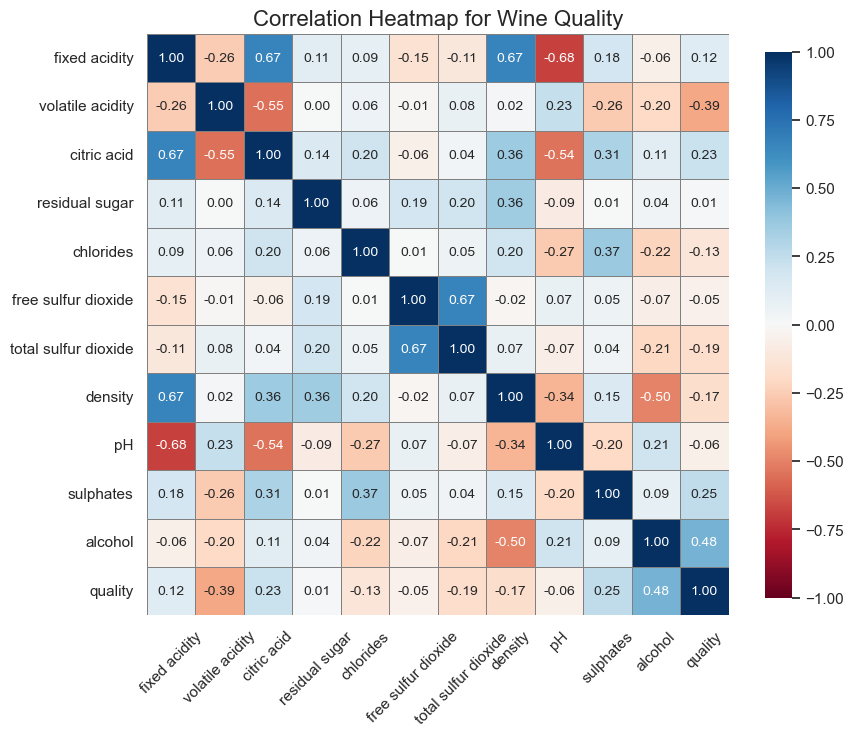

In [76]:
def heat_map(data):
    # Calculating the correlation matrix
    correlation_matrix = data.corr()

    # Create a heatmap using seaborn with advanced customization
    plt.figure(figsize=(9, 8))
    sns.heatmap(correlation_matrix,
                annot=True,  # Show numeric annotations
                fmt=".2f",  # Format annotation to 2 decimal places
                cmap='RdBu',  # Color palette
                vmin=-1, vmax=1,  # Set color scale limits
                linewidths=0.5,  # Add line widths between cells
                linecolor='gray',  # Set line color
                cbar=True,  # Show color bar
                cbar_kws={"shrink": 0.8},  # Adjust color bar size
                square=True,  # Make cells square-shaped
                annot_kws={"size": 10},  # Set annotation text size
                xticklabels=correlation_matrix.columns,  # Set x-axis labels
                yticklabels=correlation_matrix.columns,  # Set y-axis labels
                )
    plt.title('Correlation Heatmap for Wine Quality', fontsize=16)  # Set title and its fontsize
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.tight_layout()  # Adjust layout to prevent cutoff of labels
    plt.savefig('heatmap.png')
    plt.show()


heat_map(data)

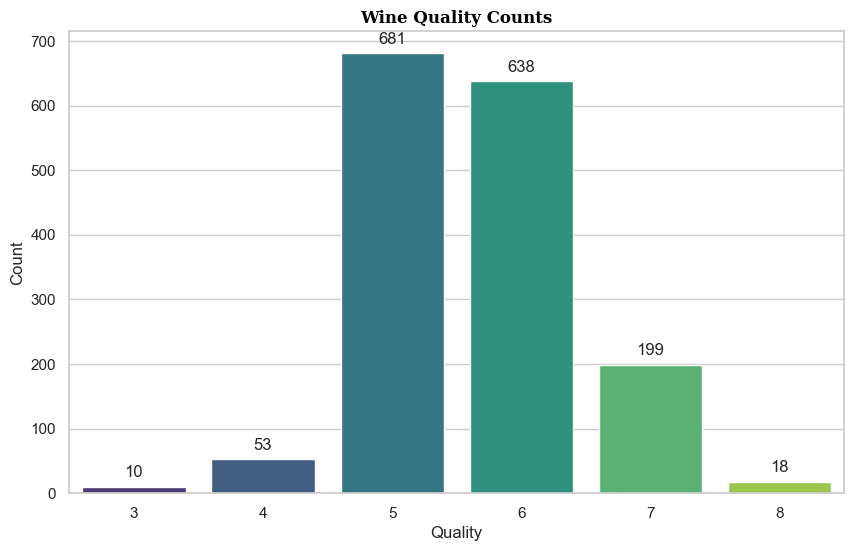

In [77]:
def bar_chart(data):
    # Count the number of occurrences of each quality rating
    quality_counts = data['quality'].value_counts().sort_index()

    # Set the style
    sns.set(style="whitegrid")
    font1 = {'family': 'serif', 'color': 'black', 'size': 12, 'weight': 'bold'}
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=quality_counts.index, y=quality_counts.values, 
                     palette="viridis")
    
    # Annotate the bars with their values
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.title("Wine Quality Counts",fontdict = font1)
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.savefig('bar.png')
    plt.show()

bar_chart(data)

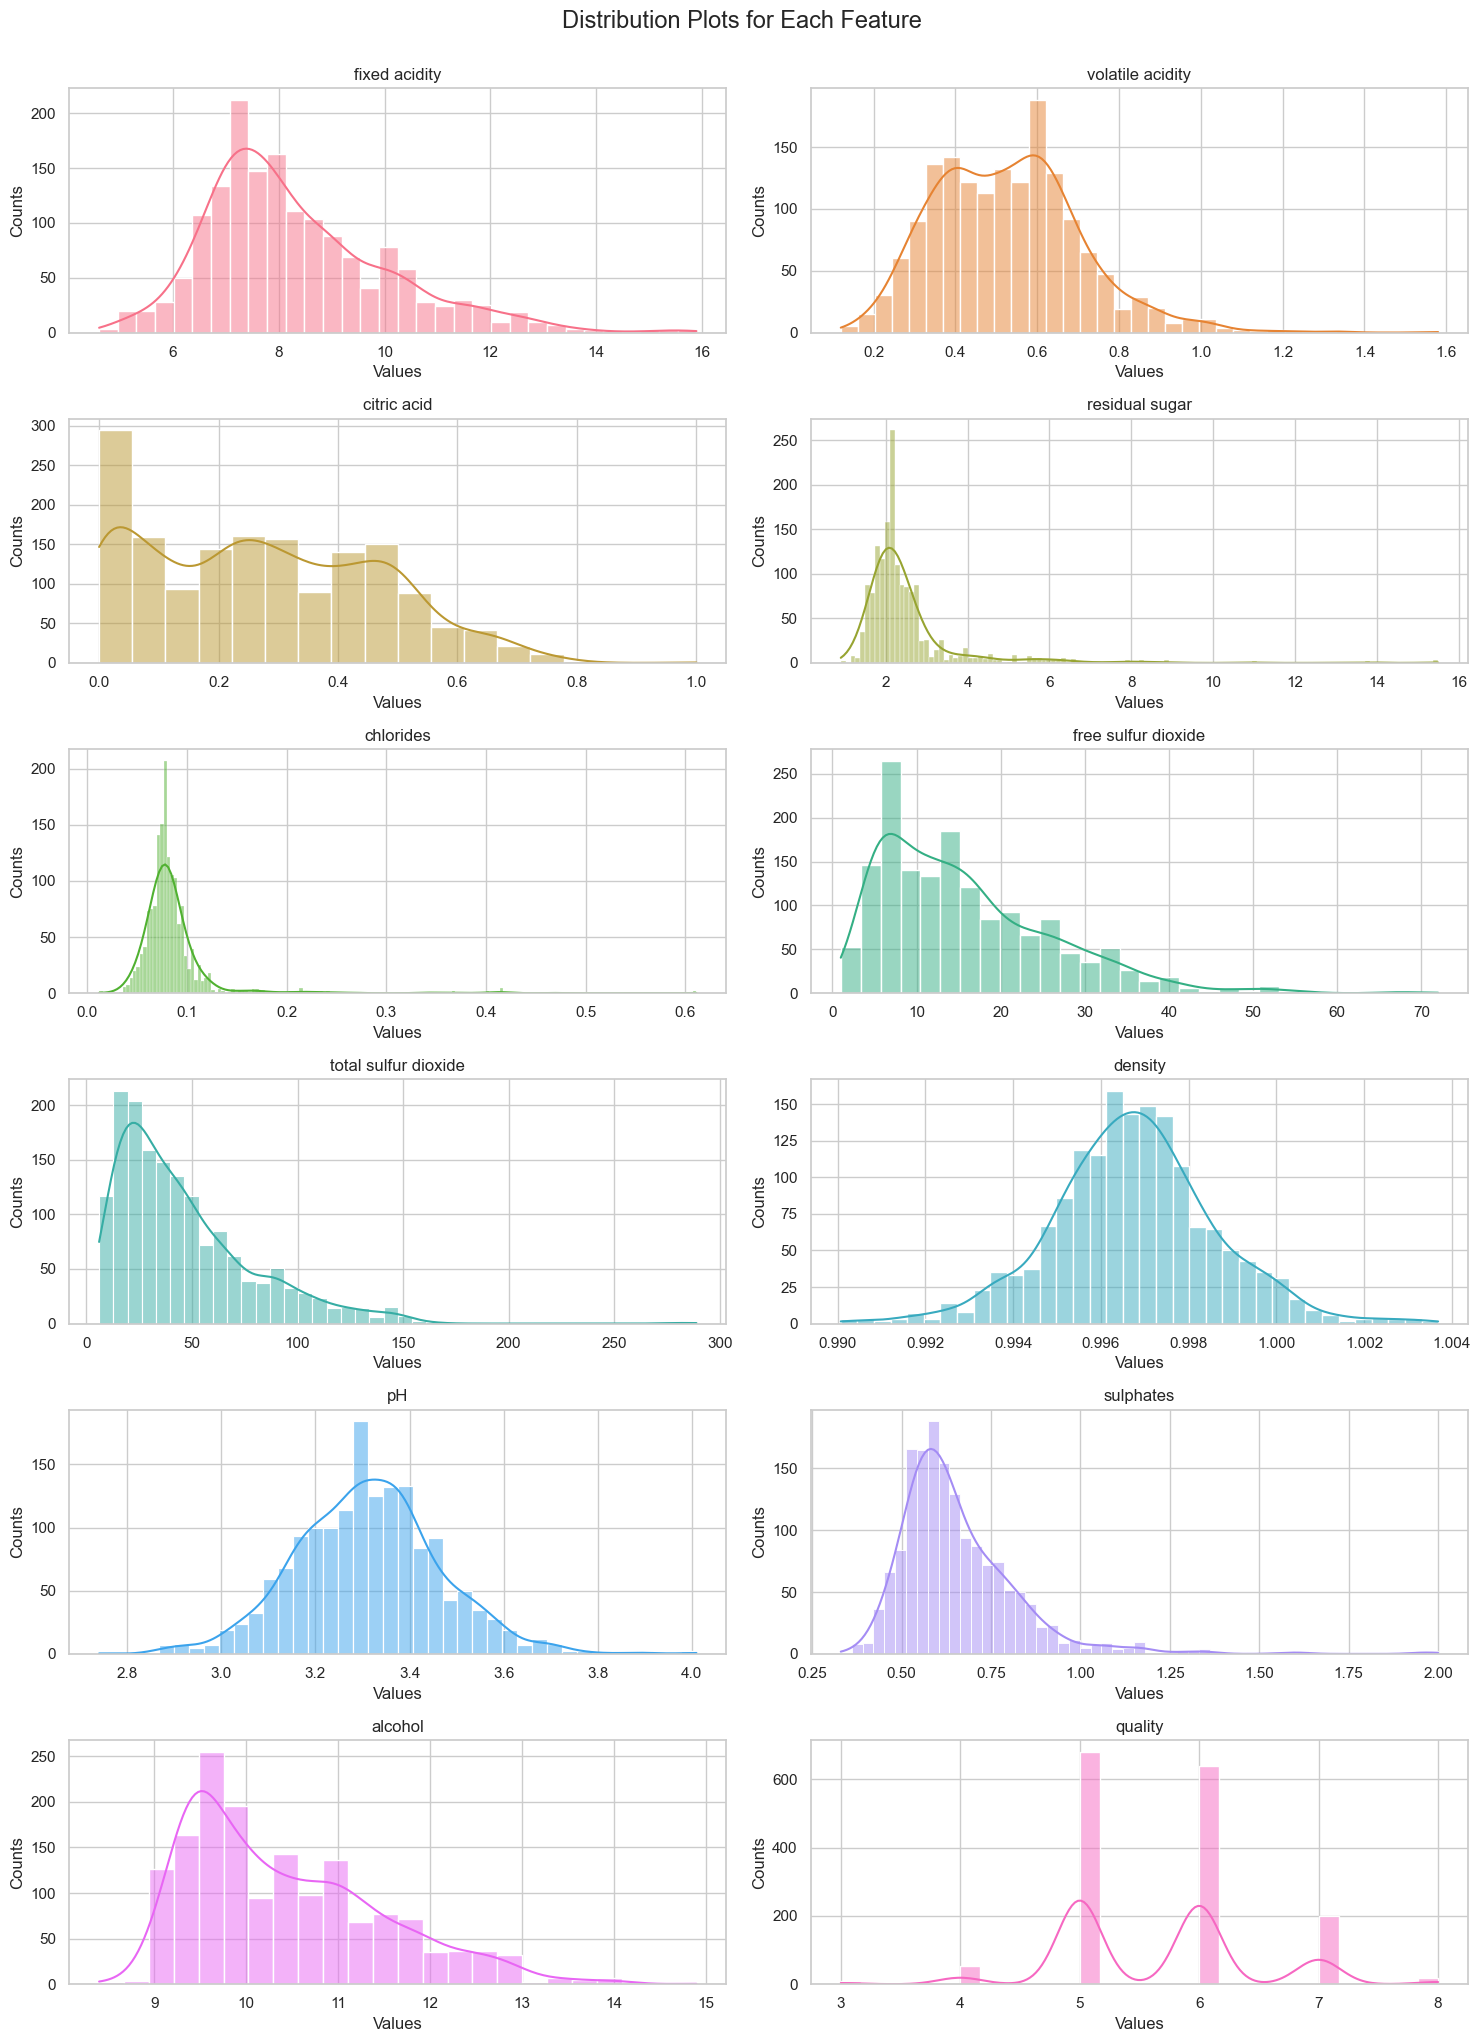

In [78]:

# Create a grid of subplots
def histogram(data):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
    # Flatten axes for easier iteration

    axes = axes.flatten()

    # Define a color palette
    colors = sns.color_palette("husl", len(data.columns))

    # Plot histograms for each feature
    for i, (column, color) in enumerate(zip(data.columns, colors)):
        sns.histplot(data=data[column], ax=axes[i], kde=True, color=color)
        axes[i].set_title(column)
        axes[i].set_xlabel("Values")
        axes[i].set_ylabel("Counts")

    # Adjust layout
    plt.tight_layout()
    plt.suptitle("Distribution Plots for Each Feature", x=0.5, y=1.02, fontsize=17)
    plt.savefig('Hist.png')
    plt.show()
    


histogram(data)


In [79]:
def box_plot():
    box_traces = []
    for column in data.columns:
        # Exclude outliers from the data
        column_data = data[column]
        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        filtered_data = column_data[(column_data >= lower_bound) & 
                                    (column_data <= upper_bound)]

        # Create box trace without outliers
        box_trace = go.Box(y=filtered_data, name=column)
        box_traces.append(box_trace)

    # Create layout
    layout = go.Layout(height=800, width=1000, 
                       title="Box Plot for Wine Quality Features without Outliers", 
                       yaxis=dict(type='log', tickfont=dict(size=14)),
                       xaxis=dict(tickfont=dict(size=14)), title_x=0.5)

    # Create the figure
    fig = go.Figure(data=box_traces, layout=layout)

    # Show the plot
    fig.show()

box_plot()


In [80]:
def pie():
# Calculate the count of each quality rating
    quality_counts = data['quality'].value_counts()

    # Create labels and values for the pie chart
    labels = quality_counts.index.tolist()
    values = quality_counts.values.tolist()

    # Create a pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

    # Update layout
    fig.update_layout(
        title="Pie Chart of Wine Quality Ratings With Counts",
        title_x=0.5,
        title_font=dict(size=20),  # Set the title font size
        font=dict(size=14),  # Set the overall font size
        legend=dict(  # Customize the legend
        title='Quality Ratings',
        title_font=dict(size=16),  # Set the legend title font size
        font=dict(size=12),  # Set the legend font size
        x=0.8,  # Position the legend horizontally
        y=0.5   # Position the legend vertically 
    ))

    # Show the plot

    fig.show()
pie()

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

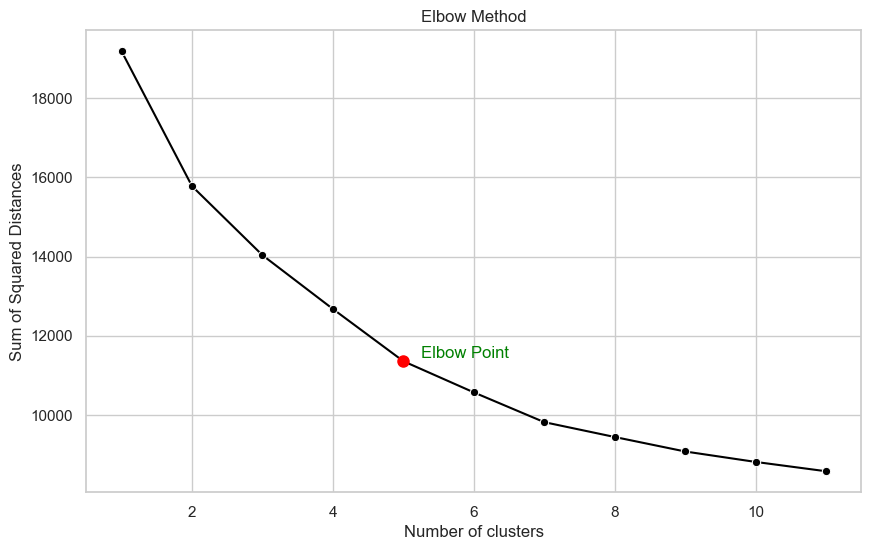

In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
def elbow_method(data):
    


    # Fit KMeans algorithm for a range of cluster numbers
    k_range = range(1, 12)
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=69)
        kmeans.fit(scaled_data)
        sse.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(1, 12), y=sse, marker='o', color='black')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method')

    # Calculate the second difference to find the inflection point
    sse_diff = np.diff(sse)
    sse_diff2 = np.diff(sse_diff)

    # Find the index of the inflection point
    elbow_index = np.where(sse_diff2 == max(sse_diff2))[0][0] + 4

    # Highlight the elbow point on the plot
    plt.plot(elbow_index + 1, sse[elbow_index], marker='o', 
             markersize=8, color='red')
    plt.text(elbow_index + 2.5, sse[elbow_index], 'Elbow Point', 
             verticalalignment='bottom',horizontalalignment='right', 
             fontsize=12, color='green')
    #save Image 
    plt.savefig('elbow.png')
    return   scaled_data 

elbow_method(data)

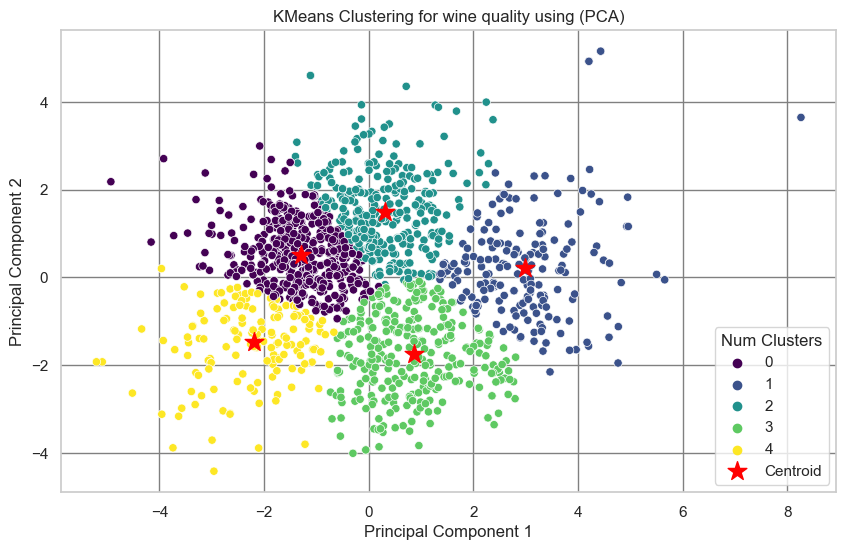

Silhouette Score: 0.3439166053662582


In [82]:

def cluster_PCA( ):
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Choose the optimal number of clusters based on the elbow method
    optimal_num_clusters = 5

    # Perform KMeans clustering with the optimal number of clusters on the PCA-transformed data
    kmeans = KMeans(n_clusters=optimal_num_clusters, 
                    n_init=10, random_state=69)
    kmeans.fit(pca_data)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_



    # Plot the clustering results on the PCA-transformed data
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=cluster_labels,
                    palette='viridis', legend='full')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red',
                label='Centroid')  # Plot centroids
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('KMeans Clustering for wine quality using (PCA)')
    plt.grid(True, color='grey')
    plt.legend(title='Num Clusters')
    plt.savefig('cluster.png')
    plt.show()
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
   
    return silhouette_avg

silhouette_avg = cluster_PCA()
print("Silhouette Score:", silhouette_avg)